In [1]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
#from keras.engine.topology import get_source_inputs

In [2]:
def VGGupdated(input_tensor=None,classes=4):    
   
    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [3]:
model = VGGupdated(classes = 4) #

Metal device set to: Apple M1


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('2math')

math_formulas_types = os.listdir('2math')
print (math_formulas_types)  #what kinds of rooms are in this dataset

print("Types of math formulas found: ", len(dataset_path))

['3_jpg', '2_jpg', '5_jpg', '+_jpg']
Types of math formulas found:  4


In [6]:
formulas = []

for item in math_formulas_types:
 # Get all the file names
 all_formulas = os.listdir('2math' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for formula in  all_formulas:
    formulas.append((item, str('2math' + '/' +item) + '/' + formula))
    print(formulas)

[('3_jpg', '2math/3_jpg/SQUARE_MATH_3_3_352.jpg')]
[('3_jpg', '2math/3_jpg/SQUARE_MATH_3_3_352.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1744.jpg')]
[('3_jpg', '2math/3_jpg/SQUARE_MATH_3_3_352.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1744.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1557.jpg')]
[('3_jpg', '2math/3_jpg/SQUARE_MATH_3_3_352.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1744.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1557.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_8_1726.jpg')]
[('3_jpg', '2math/3_jpg/SQUARE_MATH_3_3_352.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1744.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1557.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_8_1726.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_266.jpg')]
[('3_jpg', '2math/3_jpg/SQUARE_MATH_3_3_352.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1744.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_17_1557.jpg'), ('3_jpg', '2math/3_jpg/SQUARE_MATH_3_8_1726.jpg'), ('3_jpg', '2math/3_jpg

In [7]:
# Build a dataframe        
formulas_df = pd.DataFrame(data=formulas, columns=['formulas type', 'image'])
print(formulas_df.head())
#print(rooms_df.tail())

  formulas type                                  image
0         3_jpg    2math/3_jpg/SQUARE_MATH_3_3_352.jpg
1         3_jpg  2math/3_jpg/SQUARE_MATH_3_17_1744.jpg
2         3_jpg  2math/3_jpg/SQUARE_MATH_3_17_1557.jpg
3         3_jpg   2math/3_jpg/SQUARE_MATH_3_8_1726.jpg
4         3_jpg   2math/3_jpg/SQUARE_MATH_3_17_266.jpg


In [8]:
# Let's check how many samples for each category are present
print("Total number of formulas in the dataset: ", len(formulas_df))

formulas_count = formulas_df['formulas type'].value_counts()

print("formulas in each category: ")
print(formulas_count)

Total number of formulas in the dataset:  84
formulas in each category: 
3_jpg    21
2_jpg    21
5_jpg    21
+_jpg    21
Name: formulas type, dtype: int64


In [9]:
import cv2
path = '/Users/alyona_dushkina/2math/'


im_size = 300

images = []
labels = []

for i in math_formulas_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [10]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape   

(84, 300, 300, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Предположим, что y - это одномерный массив меток классов (4 класса)
y = formulas_df['formulas type'].values

# Используем LabelEncoder для преобразования строковых меток в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Используем OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
Y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

print(Y_onehot)


[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0.

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y_onehot = shuffle(images, Y_onehot, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y_onehot, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(79, 300, 300, 3)
(79, 4)
(5, 300, 300, 3)
(5, 4)


In [14]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32)  


Epoch 1/10


2024-01-19 13:53:28.239608: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 71s 29s/step - loss: 12.5613 - accuracy: 0.2911
Epoch 2/10
3/3 [==============================] - 68s 17s/step - loss: 1.4005 - accuracy: 0.1772
Epoch 3/10
3/3 [==============================] - 65s 21s/step - loss: 1.3902 - accuracy: 0.2532
Epoch 4/10
3/3 [==============================] - 81s 27s/step - loss: 1.3943 - accuracy: 0.2785
Epoch 5/10
3/3 [==============================] - 52s 14s/step - loss: 1.3868 - accuracy: 0.2532
Epoch 6/10
3/3 [==============================] - 40s 13s/step - loss: 1.3888 - accuracy: 0.2658
Epoch 7/10
3/3 [==============================] - 44s 15s/step - loss: 1.3864 - accuracy: 0.2658
Epoch 8/10
3/3 [==============================] - 38s 13s/step - loss: 1.3852 - accuracy: 0.2658
Epoch 9/10
3/3 [==============================] - 47s 14s/step - loss: 1.3852 - accuracy: 0.2658
Epoch 10/10
3/3 [==============================] - 44s 15s/step - loss: 1.3852 - accuracy: 0.2658


In [15]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 1.4316 - accuracy: 0.0000e+00
Loss = 1.431634545326233
Test Accuracy = 0.0


# Take input from User and Classify that image

Input image shape: (1, 300, 300, 3)


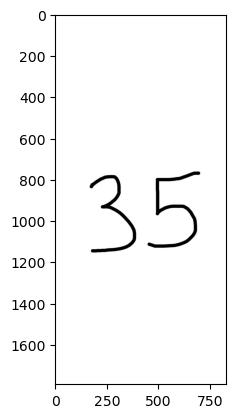

In [16]:
from tensorflow.keras.preprocessing import image
from PIL import Image
from matplotlib.pyplot import imread, imshow

img_path = 'test_img.jpg'

img = Image.open(img_path)
img = img.resize((300, 300))  # Если требуется изменить размер изображения
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)


In [17]:
print(model.predict(x))


1/1 [==============================] - 0s 290ms/step
[[0.25314873 0.25658873 0.22701313 0.2632495 ]]
